## import

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

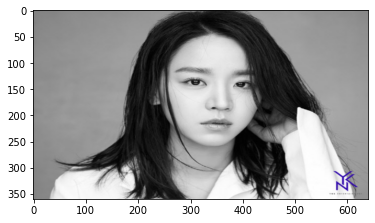

In [2]:
import os
img_path = '/home/aiffel0049/aiffel/Exploration/10.camera_app/images/image.jpg'
img_bgr = cv2.imread(img_path)
img_bgr = cv2.resize(img_bgr, (640, 360))
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

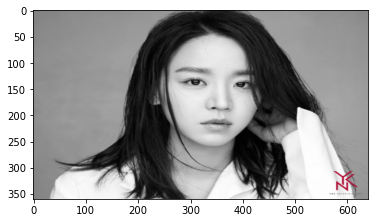

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## face recognition

In [4]:
import dlib
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)

rectangles[[(262, 77) (448, 263)]]


[(262, 77) (448, 263)]


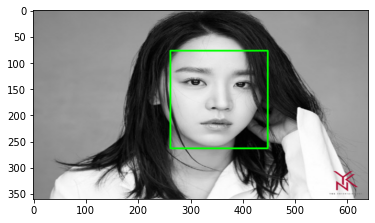

In [5]:
for dlib_rect in dlib_rects:
    print(dlib_rect)
    left = dlib_rect.left()
    right = dlib_rect.right()
    top = dlib_rect.top()
    bottom = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (left, top), (right, bottom), (0, 255, 0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## face landmark

In [6]:
model_path = '/home/aiffel0049/aiffel/Exploration/10.camera_app/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [7]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list(list_landmarks[0])))
print(list(list_landmarks))

68
[[(254, 130), (256, 153), (260, 175), (264, 196), (272, 216), (285, 234), (303, 247), (323, 257), (345, 260), (365, 256), (382, 245), (397, 232), (411, 218), (421, 201), (426, 183), (428, 164), (429, 145), (271, 118), (287, 109), (306, 108), (326, 111), (344, 117), (378, 120), (391, 116), (405, 115), (418, 116), (427, 123), (361, 138), (361, 152), (362, 165), (363, 179), (340, 190), (350, 191), (359, 193), (367, 192), (375, 191), (293, 138), (305, 133), (318, 134), (329, 142), (317, 143), (304, 142), (384, 145), (394, 138), (405, 138), (414, 144), (406, 147), (394, 147), (321, 216), (335, 210), (348, 206), (357, 208), (365, 207), (373, 211), (381, 218), (372, 226), (363, 229), (354, 230), (345, 229), (333, 225), (327, 216), (347, 215), (356, 216), (364, 216), (376, 218), (364, 217), (355, 217), (347, 216)]]


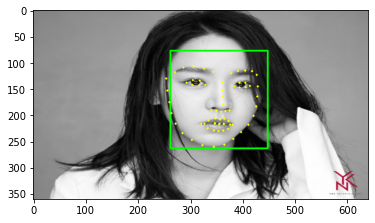

In [8]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)  # 이미지, 원의 중심좌표, 반지름, BGR 형태, 선의 두께(-1 : 안을 채움)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 만들어 붙이기

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x, y=landmark[30]
    w=landmark[14][0] - landmark[2][0]
    h=landmark[48][1] - landmark[36][1]
    print('(x, y) : (%d, %d)'%(x, y))
    print('(w, h) : (%d, %d)'%(w, h))
    

(x, y) : (363, 179)
(w, h) : (166, 78)


In [10]:
sticker_path = '/home/aiffel0049/aiffel/Exploration/10.camera_app/images/cat_nose.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
print(img_sticker.shape)

(78, 166, 3)


In [11]:
refined_x = x - w // 2 # left
refined_y = y - h // 2 # top
print('(x, y) : (%d, %d)'%(refined_x, refined_y))

(x, y) : (280, 140)


In [12]:
x_shape = img_sticker.shape[0]
y_shape = img_sticker.shape[1]

In [13]:
sticker_area = img_show[refined_y: refined_y + x_shape, refined_x : refined_x + y_shape]
img_show[refined_y: refined_y + x_shape, refined_x: refined_x + y_shape] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

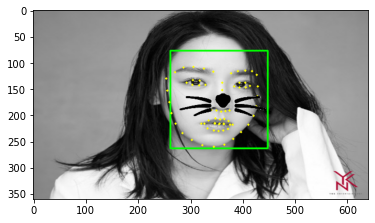

In [14]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

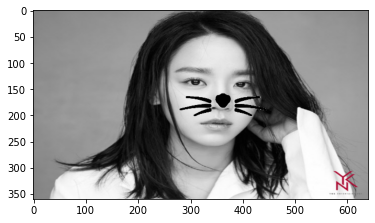

In [15]:
sticker_area = img_bgr[refined_y: refined_y + x_shape, refined_x : refined_x + y_shape]
img_bgr[refined_y: refined_y + x_shape, refined_x: refined_x + y_shape] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()